<b>Train/test splits in time series<b>
    
In machine learning, train/test split splits the data randomly, as there’s no dependence from one observation to the other. That’s not the case with time series data. Here, you’ll want to use values at the rear of the dataset for testing and everything else for training.
    
For example, if you had 144 records at monthly intervals (12 years), a good approach would be to keep the first 120 records (10 years) for training and the last 24 records (2 years) for testing.
    
Let’s see this in action. To start, you’ll import the libraries and the dataset — Airline Passengers:

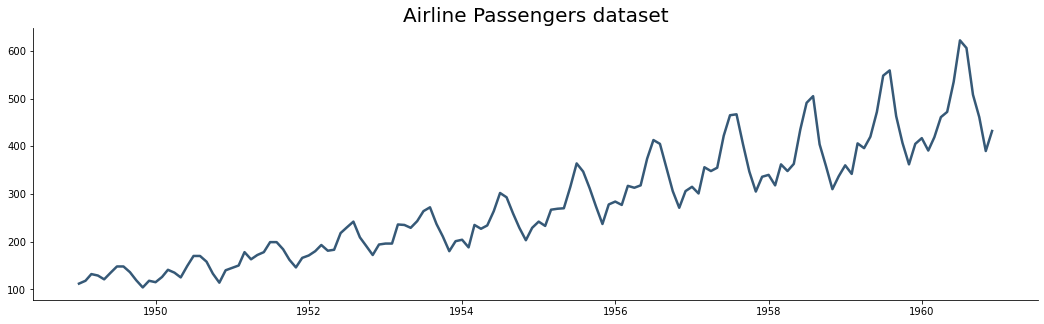

In [5]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler

rcParams['figure.figsize'] = 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5


# Load
df = pd.read_csv('airplane-passengers.csv', index_col='Month', parse_dates=True)

# Visualize
plt.title('Airline Passengers dataset', size=20)
plt.plot(df);

Let’s say you want to use the last two years for testing and everything else for training. You can use Python’s slicing notation to split the dataset:

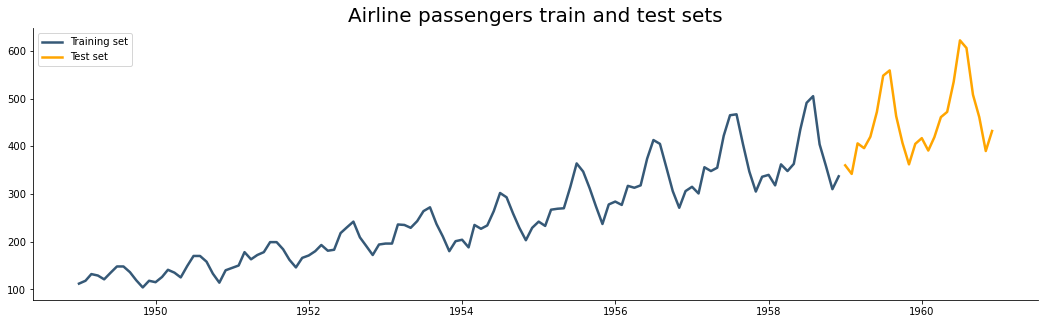

In [7]:
test_size = 24

df_train = df[:-test_size]
df_test = df[-test_size:]

plt.title('Airline passengers train and test sets', size=20)
plt.plot(df_train, label='Training set')
plt.plot(df_test, label='Test set', color='orange')
plt.legend();

And that’s all there is to train/test splits. Keep in mind — you should never split time series data randomly.

<b>Evaluation metrics<b>
    
When evaluating time series models, you can either opt for relative model performance metrics or general regression metrics.
    
<b>Relative model performance metrics<b>
    
You’ll often hear two acronyms thrown around when choosing a time series model — AIC and BIC.
    
AIC, or Akaike Information Criterion, shows you how good a model is relative to the other models. AIC penalizes complex models in favor of simple ones. For example, if two models have the same performance in forecasting but the second one has 10 more parameters, AIC will favor the first model.
    
The AIC value of a model is calculated with the following formula:

AIC = 2k - 2ln(L)

Where k is the number of parameters in the model, L-hat is the maximum value of the likelihood function for the model, and ln is the natural logarithm.

BIC, or Bayesian Information Criterion, is similar to AIC. It is an estimate of a function of the posterior probability of a model being true under a ceratin Bayesian setup (source). Once again, the lower the value, the better the model.

The BIC value of a model is calculated with the following formula:

BIC = kln(n) - 2ln(L)

Where k is the number of parameters in the model, L-hat is the maximum value of the likelihood function for the model, n is the number of data points (sample size), and ln is the natural logarithm.\

We won’t go over Python implementation of AIC and BIC today since that would require training multiple forecasting models. You’ll see how these work in future articles.

Remember that both AIC and BIC are relative metrics, so you can’t directly compare models for different datasets. Instead, choose the model with the lowest score.

<b>General regression metrics<b>

You can use any regression evaluation metric, such as MAE, MSE, or RMSE to evaluate time series forecasts. We’ll go over two of these today:
    
    RMSE — Root Mean Squared Error
    MAPE — Mean Absolute Percentage Error
    
RMSE tells you how many units your model is wrong on average. In our airline passengers example, the RMSE will tell you how many passengers you can expect the model to miss in every forecast.
    
MAPE tells you how wrong your forecasts are percentage-wise. I like it because, in a way, it is equivalent to accuracy metric in classification problems. For example, the MAPE value of 0.02 means your forecasts are 98% accurate.
    
The Scikit-learn package doesn’t have an official implementation for RMSE, so we’ll have to calculate it manually by taking a square root from the MSE value.
    
Let’s implement both in code — we’ll declare `rmse` as a lambda function, make arbitrary actual and forecasted data, and calculate the error metrics:

In [3]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

rmse = lambda act, pred: np.sqrt(mean_squared_error(act, pred))

# Arbitrary data
actual_passengers = [300, 290, 320, 400, 500, 350]
predicted_passengers = [291, 288, 333, 412, 488, 344]

# Error metrics
print(f'RMSE: {rmse(actual_passengers, predicted_passengers)}')
print(f'MAPE: {mean_absolute_percentage_error(actual_passengers, predicted_passengers)}')

RMSE: 9.814954576223638
MAPE: 0.024777401477832514


In a nutshell — on an average month, the predictions are off by 10 passenger units (thousands), or around 2.5%. That’s all you should know.